In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('cost_data.csv')
df.head()

,Topography,Construction Type,Amount of Land (sqft),Land Price per sqft,Number of Floors,Architectural Style,Quality Level of Raw Materials,Furnished,Luxury Level,Building Area (sqft),Construction Cost per sqft,Raw Materials Cost per sqft,Flooring Cost per sqft,Ceiling Cost per sqft,Plumbing Cost per sqft,Wiring Cost per sqft,Price
0,suburban,residential,1879,2799,2,traditional,low,Furnished,standard,1784,1580,1203,487,192,186,183,10606272
1,metropolitan,commercial,5199,44494,3,contemporary,medium,Furnished,basic,4938,1636,1399,360,194,265,142,252311643
2,rural,commercial,3592,666,24,contemporary,medium,Non-Furnished,luxury,3408,1728,1240,387,200,223,165,55859194
3,urban,residential,3099,7792,1,traditional,high,Non-Furnished,standard,2944,1672,1344,397,172,153,106,35109501
4,suburban,commercial,11108,1790,13,traditional,low,Furnished,standard,10543,1587,1463,312,95,180,109,98191865


In [3]:
df['Total Construction Cost'] = df['Construction Cost per sqft'] * df['Building Area (sqft)']
df['Total Land Cost'] = df['Amount of Land (sqft)'] * df['Land Price per sqft']
df['Total Raw Materials Cost'] = df['Price'] - (df['Total Land Cost'] + df['Total Construction Cost'])
df.head()

,Topography,Construction Type,Amount of Land (sqft),Land Price per sqft,Number of Floors,Architectural Style,Quality Level of Raw Materials,Furnished,Luxury Level,Building Area (sqft),Construction Cost per sqft,Raw Materials Cost per sqft,Flooring Cost per sqft,Ceiling Cost per sqft,Plumbing Cost per sqft,Wiring Cost per sqft,Price,Total Construction Cost,Total Land Cost,Total Raw Materials Cost
0,suburban,residential,1879,2799,2,traditional,low,Furnished,standard,1784,1580,1203,487,192,186,183,10606272,2818720,5259321,2528231
1,metropolitan,commercial,5199,44494,3,contemporary,medium,Furnished,basic,4938,1636,1399,360,194,265,142,252311643,8078568,231324306,12908769
2,rural,commercial,3592,666,24,contemporary,medium,Non-Furnished,luxury,3408,1728,1240,387,200,223,165,55859194,5889024,2392272,47577898
3,urban,residential,3099,7792,1,traditional,high,Non-Furnished,standard,2944,1672,1344,397,172,153,106,35109501,4922368,24147408,6039725
4,suburban,commercial,11108,1790,13,traditional,low,Furnished,standard,10543,1587,1463,312,95,180,109,98191865,16731741,19883320,61576804


In [4]:
df.shape

(3592, 20)

In [5]:
df.drop(columns=['Construction Type', 'Architectural Style', 
                 'Raw Materials Cost per sqft', 'Flooring Cost per sqft', 'Ceiling Cost per sqft', 
                 'Plumbing Cost per sqft', 'Wiring Cost per sqft'], inplace=True)
df.head()

,Topography,Amount of Land (sqft),Land Price per sqft,Number of Floors,Quality Level of Raw Materials,Furnished,Luxury Level,Building Area (sqft),Construction Cost per sqft,Price,Total Construction Cost,Total Land Cost,Total Raw Materials Cost
0,suburban,1879,2799,2,low,Furnished,standard,1784,1580,10606272,2818720,5259321,2528231
1,metropolitan,5199,44494,3,medium,Furnished,basic,4938,1636,252311643,8078568,231324306,12908769
2,rural,3592,666,24,medium,Non-Furnished,luxury,3408,1728,55859194,5889024,2392272,47577898
3,urban,3099,7792,1,high,Non-Furnished,standard,2944,1672,35109501,4922368,24147408,6039725
4,suburban,11108,1790,13,low,Furnished,standard,10543,1587,98191865,16731741,19883320,61576804


In [6]:
columns_wanted = ['Total Land Cost','Total Construction Cost','Total Raw Materials Cost','Price']
cost_df = df[columns_wanted].copy()
cost_df.head()

,Total Land Cost,Total Construction Cost,Total Raw Materials Cost,Price
0,5259321,2818720,2528231,10606272
1,231324306,8078568,12908769,252311643
2,2392272,5889024,47577898,55859194
3,24147408,4922368,6039725,35109501
4,19883320,16731741,61576804,98191865


In [7]:
topography_mapping = {'rural': 0, 'suburban': 1, 'urban': 2, 'metropolitan': 3}
construction_type_mapping = {'commercial': 0, 'residential': 1}
architectural_style_mapping = {'modern': 0, 'traditional': 1, 'contemporary': 2}
quality_mapping = {'low': 0, 'medium': 1, 'high': 2}
furnished_mapping = {'Non-Furnished': 0, 'Furnished': 1}
luxury_level_mapping = {'basic': 0, 'standard': 1, 'luxury': 2}

df.replace({'Topography': topography_mapping,
            'Construction Type': construction_type_mapping,
            'Architectural Style': architectural_style_mapping,
            'Quality Level of Raw Materials': quality_mapping,
            'Furnished': furnished_mapping,
            'Luxury Level': luxury_level_mapping}, inplace=True)

In [8]:
df.head()

,Topography,Amount of Land (sqft),Land Price per sqft,Number of Floors,Quality Level of Raw Materials,Furnished,Luxury Level,Building Area (sqft),Construction Cost per sqft,Price,Total Construction Cost,Total Land Cost,Total Raw Materials Cost
0,1,1879,2799,2,0,1,1,1784,1580,10606272,2818720,5259321,2528231
1,3,5199,44494,3,1,1,0,4938,1636,252311643,8078568,231324306,12908769
2,0,3592,666,24,1,0,2,3408,1728,55859194,5889024,2392272,47577898
3,2,3099,7792,1,2,0,1,2944,1672,35109501,4922368,24147408,6039725
4,1,11108,1790,13,0,1,1,10543,1587,98191865,16731741,19883320,61576804


In [9]:
X = df[['Topography', 'Building Area (sqft)', 'Quality Level of Raw Materials', 'Furnished', 'Luxury Level']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
tree_model = DecisionTreeRegressor(random_state=42)
forest_model = RandomForestRegressor(random_state=42)

models = {'Linear Regression': linear_model, 'Decision Tree': tree_model, 'Random Forest': forest_model}

for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{name} - Score: {score}")

Linear Regression - Score: 0.6364510480406351
Decision Tree - Score: 0.6971803040381606
Random Forest - Score: 0.8103718873163829


In [10]:
predicted_price = forest_model.predict([[3, 1500, 1, 0, 0]])
print("Predicted price:", round(predicted_price[0], 2))

Predicted price: 60381298.79


C:\Users\91994\Pictures\New folder\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


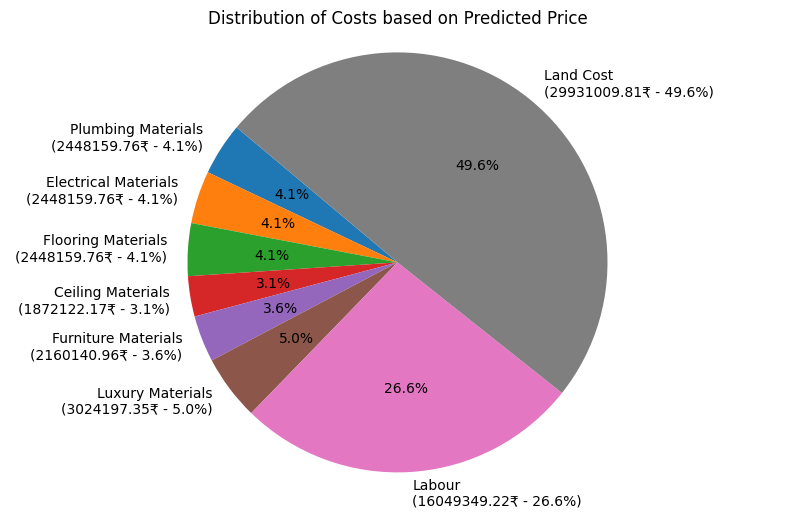

In [11]:
p = 0.2385

plumbing_cost = predicted_price * p * 0.17
electrical_cost = predicted_price * p * 0.17
flooring_cost = predicted_price * p * 0.17
ceiling_cost = predicted_price * p * 0.13
furniture_cost = predicted_price * p * 0.15
luxury_cost = predicted_price * p * 0.21

labour = predicted_price * 0.2658
land_cost = predicted_price * 0.4957

plumbing_cost = plumbing_cost[0]
electrical_cost = electrical_cost[0]
flooring_cost = flooring_cost[0]
ceiling_cost = ceiling_cost[0]
furniture_cost = furniture_cost[0]
luxury_cost = luxury_cost[0]

costs = list(map(float, [plumbing_cost, electrical_cost, flooring_cost, ceiling_cost,
                         furniture_cost, luxury_cost, labour, land_cost]))
labels = ['Plumbing Materials', 'Electrical Materials', 'Flooring Materials', 'Ceiling Materials',
          'Furniture Materials', 'Luxury Materials', 'Labour', 'Land Cost']
total_cost = sum(costs)

percentages = [(cost / total_cost) * 100 for cost in costs]

labels_with_price = [f'{label}\n({cost:.2f}₹ - {percent:.1f}%)' for label, cost, percent in zip(labels, costs, percentages)]

plt.figure(figsize=(10, 6))
plt.pie(costs, labels=labels_with_price, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Costs based on Predicted Price')
plt.axis('equal')
plt.show()